In [3]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_timestamp, hour, dayofweek
import matplotlib.pyplot as plt

In [4]:
# Create a SparkSession
spark = SparkSession.builder \
    .appName("NYC Taxi Data Analysis") \
    .getOrCreate()

In [5]:
# Load the Parquet file (replace with your actual path)
df = spark.read.parquet("data/yellow_tripdata_2025-01.parquet")

In [6]:
# Show schema and first few rows
df.printSchema()
df.show(5)

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)
 |-- cbd_congestion_fee: double (nullable = true)

+--------+--------------------+---------------------+---------------+------

In [7]:
# Convert pickup/dropoff datetime to proper timestamp types (if not already)
df = df.withColumn("pickup_datetime", to_timestamp("tpep_pickup_datetime")) \
       .withColumn("dropoff_datetime", to_timestamp("tpep_dropoff_datetime"))

In [8]:
# Add useful time-based features
df = df.withColumn("hour", hour("pickup_datetime")) \
       .withColumn("dayofweek", dayofweek("pickup_datetime"))

In [9]:
# Filter out records with invalid values
df = df.filter((col("trip_distance") > 0) & (col("fare_amount") > 0))

In [10]:
# Show basic statistics
df.select("trip_distance", "fare_amount").describe().show()

+-------+-----------------+------------------+
|summary|    trip_distance|       fare_amount|
+-------+-----------------+------------------+
|  count|          3253864|           3253864|
|   mean| 5.51406855049818|18.221431786947555|
| stddev|514.1513304043349| 478.9001363723414|
|    min|             0.01|              0.01|
|    max|        276099.95|         863372.12|
+-------+-----------------+------------------+



In [11]:
# Analyze pickup count by hour
pickup_by_hour = df.groupBy("hour").count().orderBy("hour")
pickup_pd = pickup_by_hour.toPandas()

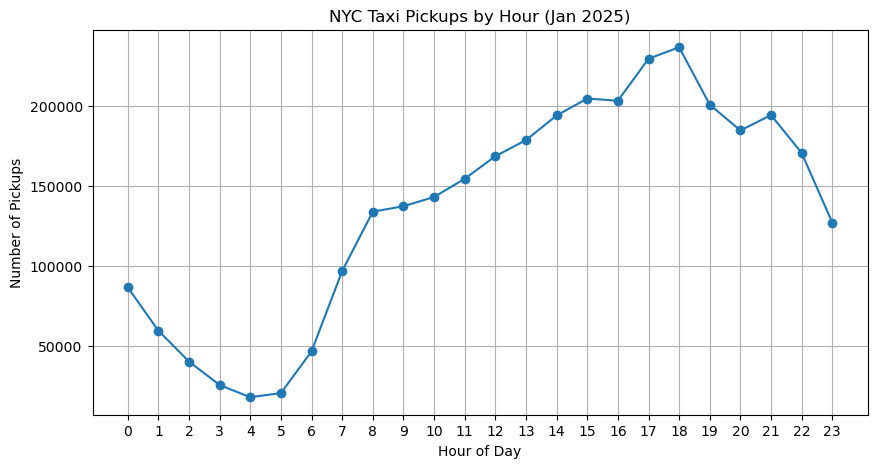

In [12]:
# Plot: Pickups by hour
plt.figure(figsize=(10, 5))
plt.plot(pickup_pd["hour"], pickup_pd["count"], marker='o')
plt.title("NYC Taxi Pickups by Hour (Jan 2025)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()